# Classification

In this exercise we are going through the application of different classification methods and related concepts.

# Submission

In order to submit on gradescope, you need to submit the following:
- the homework jupyter notebook it self ```hw7.ipynb```
- the pdf generated from the notebook, you can get the pdf from ```File->Print Preview```
- the .py file generated from the notebook, you can get the .py file from ```File->Download as->Python(.py)```

# 1. QMNIST Classification 

In [28]:
# import some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle
np.set_printoptions(suppress=True)

## 1.1 Load your data

In [15]:
pkl_file = open('./datasets/qmnist.pkl','rb')
data = pickle.load(pkl_file)

train_data =data['train_data']
train_labels = data['train_labels']

test_data = data['test_data']
test_labels = data['test_labels']

In [16]:
train_data.shape, test_data.shape

((60000, 784), (50000, 784))

## 1.2 Plot your data

Each QMNIST data point represents a 28 * 28 pixel hand written digit. Complete the following code to plot the first five data point from the train dataset.

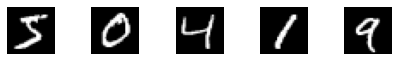

In [4]:
# np.array.reshape might be useful.
fig, axes = plt.subplots(1, 5, figsize=(6, 6))
fig.tight_layout()

for i in range(5):
    img = np.resize(train_data[i],(28,28))
    axes[i].imshow(img,'gray')
    axes[i].axis('off')
plt.show()

## 1.3 Naive Bayes

sklearn has two different implementions of naive bayes that we can use for this problem: 
- ```CategoricalNB()```
- ```GaussianNB()```  

Let's take a loot at both of them.

In [29]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

### 1.3.1 CategoricalNB

In CategoricalNB, we assume that each feature in the dataset is categorical. Therefore, the The probability of category $t$ in feature $i$ given class $c$ is estimated as:  
<div align='center'>
    <span style="font-size:1.5em;">$P(x_i=t|y=c; \alpha)=\frac{N_tic+\alpha}{N_c+\alpha n_i}$</span>
</div>
This is just what we see in class, with $\alpha$ being the smoothing variable.

Your task here is to draw out the test accuracy score for $\alpha$ between 0 and 2 with step to be 0.1.

In [6]:
# train models
accuracy=[]
alpha_range = np.arange(0,2.0,0.1)
for a in alpha_range:
    classify = CategoricalNB(alpha = a,min_categories = 256)
    classify.fit(train_data,train_labels)
    accuracy.append(classify.score(test_data,test_labels))
    

/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


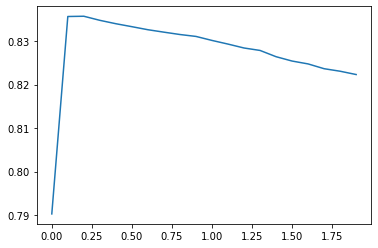

In [7]:
# make the plot
plt.plot(alpha_range,accuracy)

### Question: Describe how test accuracy changes and explain.
As the alpha increases, the test accuracy increases at the first time, and then decrease.
When alpha increases fron zero to a small number, the smoothing method helps avoiding zero probability when not seeing it in training set. However, as alpha continues increaseing, the laplace smoothing method will have an effect on the data distribution of real training set.

### 1.3.2 GaussianNB

In GaussainNB, we no longer assume each feature is categorical. Instead, we assume the likelyhood of each feature follows a Gaussain Distribution:

<div align='center'>
    <span style="font-size:1.5em;">$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma^{2}_{y}}}\exp{(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})}$</span>
</div>

Again draw out the test accuracy score for $var\_smoothing$ between 0 and 2 with step to be 0.1.

In [8]:
# train models
var_range = np.arange(0,2.0,0.1)
accuracy=[]
for v in var_range:
    classify = GaussianNB(var_smoothing = v)
    classify.fit(train_data,train_labels)
    accuracy.append(classify.score(test_data,test_labels))

/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:454: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:454: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


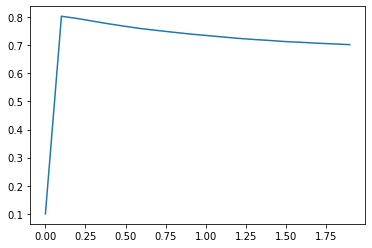

In [9]:
# make the plot
plt.plot(alpha_range,accuracy)

### Question: Compare the performance of the model with $var\_smoothing=0$ and the model with $var\_smoothing$ being other values. What do you find? How would you explain this senario? 

When the var_smoothing =0, both of the model have a bad performance. The reason is that, a bayes model without smoothing parameter will cause zero probability when not seeing a specific feature in training set.

### Question: Comparing the test accuracy between the above two different Naive Bayes models. Which one has a relatively low score? What might be the cause?
The GsussianNB has a relativelo low score compared with CategoryNB.
The feature distribution of this problem doesn't match well as a Gaussian distribution.

## 1.4 Confusion Matrix

In this section, we would like to analyze the confusion matrix of a given model.

The following is the definition of a confusion matrix:  

By definition a confusion matrix $C$ is such that $C_{i, j}$
is equal to the number of observations known to be in group $i$ and
predicted to be in group $j$.

For confusion matrix, use `sklearn.metrics.confusion_matrix`

Firstly, compute confusion matrix using ```CategoricalNB``` with $\alpha=0.5$ and test data.

In [12]:
classify = CategoricalNB(alpha = 0.5,min_categories = 256)
classify.fit(train_data,train_labels)
test_predict = classify.predict(test_data)

<AxesSubplot:>

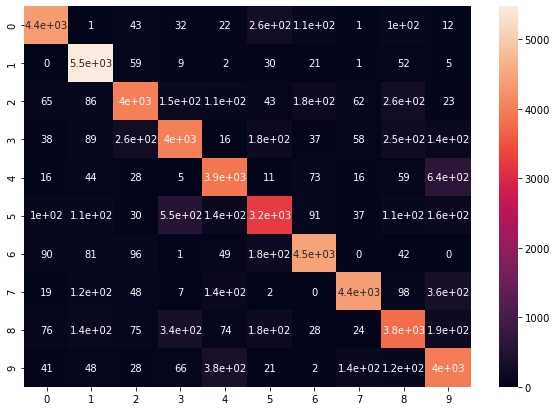

In [13]:
from sklearn.metrics import confusion_matrix

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(test_labels, test_predict)
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
# print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


### Question: What are the top five confusing pairs (i -> j) of classes for you model? What might be the cause?
The top five confusing pairs are (4->9),(5->3),(9->4),(7->9),(8->3). The features of i and j in top five confusing pairs have more commons comparing with other confusing pairs which can lead to more wrong prediction.



# 2. Binary Classification

Now we have gone over a problem with 10 classes. Let's take a deeper look at the classification on a relatively simple dataset. 

## 2.1 Binary Dateset 1

Note that we have two binary datasets in the fold you downloaded. Let's first take a look at the first one.

In [30]:
df = pd.read_csv('./datasets/binary_dataset1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,0.566797,-0.010016,0.146793,1.00,1


Let's take a look at the class distribution. Your task here is to draw a bar chart with each bar representing a simple class.

<AxesSubplot:xlabel='count', ylabel='Class'>

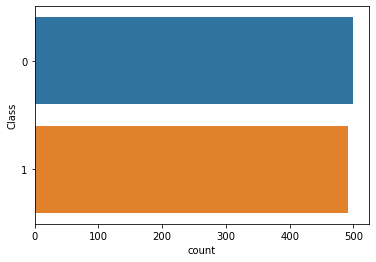

In [31]:
# Make the bar chart
sn.countplot(y="Class",data = df)

Before training any model, you need to get the X and y out of the dataframe and do train test split

In [32]:
# Get X and y from the dataset
y = df[["Class"]].values.ravel()
X = pd.get_dummies(df.drop(["Class"], axis=1)).values

In [38]:
# Do train test split with random_state=0 and test_size=0.5
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

### 2.1.1 Naive Bayes in Binary Classification

First we want to solve this problem using Naive Bayes model with proper parameter. Choose a proper Naive Bayes class to solve this priblem. Report your test accuracy.

In [39]:
accuracy_list=[]
for a in np.arange(0,2.0,0.1):
    classify = GaussianNB(var_smoothing= a)
    classify.fit(X_train,y_train)
    accuracy_list.append((classify.score(X_test,y_test),a))
    best_a = max(accuracy_list,key = lambda x:x[0])
classify = GaussianNB(var_smoothing=best_a[1])
classify.fit(X_train,y_train)
print(best_a)
print(classify.score(X_test,y_test))

(0.9737903225806451, 0.0)
0.9737903225806451


### 2.1.2 Using Regression for Classification

Since this is a binary classification problem, we can solve it in the following steps:
1. Fit a linear regression model
2. Get your raw predicted values $x_r$ from the model
3. Find a threshold $\epsilon$ in a way such that 
4. Get your final predicted class $x_c$ in a way that $x_c=0$ if $x_r<\epsilon$, otherwsie $x_c=1$  

One way to choose the $\epsilon$ here is to find the one that maximize the train accuracy, and then apply to test data.  

So your task here is to create such a model, find $\epsilon$, and report test accuracy.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
X_predict = regressor.predict(X_train)
accuracy_list = []

for epsilon in np.arange(0,1,0.01):
    X_predict_thres = np.where(X_predict<epsilon,0,1)
    accuracy_list.append((accuracy_score(y_train,X_predict_thres),epsilon))
best_epsilon = max(accuracy_list,key = lambda x : x[0])

X_predict = regressor.predict(X_test)
X_predict_thres = np.where(X_predict<best_epsilon[1],0,1)
print(best_epsilon)
print(accuracy_score(y_test,X_predict_thres))

(0.9899193548387096, 0.23)
0.9737903225806451


Write down what you find here:
- $\epsilon$ = 0.23
- train_accuracy = 0.9899193548387096
- test_accuracy = 0.9737903225806451

### Question: Can you think of any model you learnt from class that is similar to this way of doing classification?
Perceptron method.

## 2.2 Binary dataset 2

Then let's take a look at the second binary dataset.  

As usual, we take a look at the class distribution.

In [40]:
df = pd.read_csv('./datasets/binary_dataset2.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,0.566797,-0.010016,0.146793,1.00,1


<AxesSubplot:xlabel='count', ylabel='Class'>

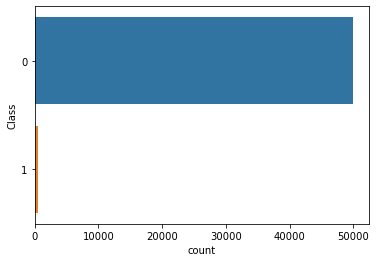

In [41]:
sn.countplot(y="Class",data = df)

### Question: Compare the distribution with the first dataset. What do you find?
This dataset is extremely imblanced.

Again you need to get the X and y out the dataframe and do train test split.

In [42]:
# Get X and y from dataset
y = df[["Class"]].values.ravel()
X = pd.get_dummies(df.drop(["Class"], axis=1)).values

In [43]:
# Do train test split with random_state=0 and test_size=0.5
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

### 2.2.1 Accuracy for Naive Bayes

Let's train a Naive Bayes model again. Similar with 2.1.1, choose a proper Naive Bayes class with a proper smoothing variable to solve this priblem. Report your test accuracy.

In [46]:
accuracy_list=[]
for a in np.arange(0,2.0,0.1):
    classify = GaussianNB(var_smoothing= a)
    classify.fit(X_train,y_train)
    accuracy_list.append((classify.score(X_test,y_test),a))
    best_a = max(accuracy_list,key = lambda x:x[0])
classify = GaussianNB(var_smoothing=best_a[1])
classify.fit(X_train,y_train)
print(best_a)
print(classify.score(X_test,y_test))

(0.9952863820011091, 0.1)
0.9952863820011091


### Question: According to your accuracy score, how would you evaluate your model?
This dataset is extremely imblanced, the model can even achieve high accuracy score by blindly labeling all data as 0.
Therefore, we'd better to choose other metrics like recall and fall-out to evaluate our model.

### 2.2.2 Confusion Matrix and Different Metrics

![avatar](./pictures/confusionmatrix.svg)

A very important tool to debug classifiers is the confusion matrix. For binary classification, it contains four different cells:

- **True positives (TP)**: observations that were predicted as belonging to the positive class correctly.

- **False positives (FP)**: observations that were predicted as belonging to the positive class incorrectly.

- **True negatives (TN)**: observations that were predicted as belonging to the negative class correctly.

- **False negatives (FN)**: observations that were predicted as belonging to the negative class incorrectly.

These are all interesting in and of themselves, but they can also be combined in aggregate metrics such as:

- **Accuracy**: how often are we predicting the class label?
- **Precision**: how many of our positive outcomes are actually positive?
- **Recall/Sensitivity**: how many of the positive outcomes are we able to recall?
- **Fall-Out**: how many of our negative outcomes are actually positive?

Suppose each data point in the data set represents a patient, and the class 1 represensts a patient is tested positive for a desease while 0 means tested negative. Choose a metric and report the metric score you choose for your model.

<AxesSubplot:>

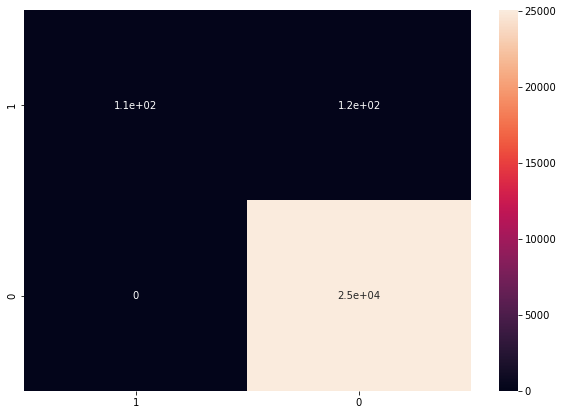

In [47]:
# Draw your confusion matrix here
from sklearn.metrics import confusion_matrix
labels = [1, 0]
y_predict = classify.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred = y_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
# print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


In [48]:
# Calculate the metric you chose here
Accuracy = (df_cm.loc[1][1]+df_cm.loc[0][0])/len(y_test)
Precision = df_cm.loc[1][1]/(df_cm.loc[1][1]+df_cm.loc[0][1])
Recall = df_cm.loc[1][1]/(df_cm.loc[1][1]+df_cm.loc[1][0])
FallOut = df_cm.loc[0][1]/(df_cm.loc[0][1]+df_cm.loc[0][0])
print("Accuracy: "+str(Accuracy))
print("Precision: "+str(Precision))
print("Recall: "+str(Recall))
print("FallOut: "+str(FallOut))

Accuracy: 0.9952863820011091
Precision: 1.0
Recall: 0.48484848484848486
FallOut: 0.0


### Question: Is the metric you chose higher is better or lower is better in this situation? What would you say about your model using the metric you chose?
For medical diganoise, the recall and fallout metric is more important, the recall higher is better and the fallout lower is better. If we focus on recall and fallout values, the model may have a bad performance on precision performance.